## Single-label multiclass text classification
Ref: François Chollet - Deep Learning with Python

In [12]:
from tensorflow.keras.datasets import  reuters

(train_data, train_labels),  (test_data, test_labels) =  reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()

reverse_word_index =  dict((value, key)  for key,value  in word_index.items())
decoded_newswire =  ' '.join(reverse_word_index.get(i-3, '?')  for  i in  train_data[0])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
def  to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [16]:
# build in one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
y_train[0], train_labels[0]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 np.int64(3))

In [24]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0000 00:00:1739063238.098707   13909 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3613 - loss: 3.2838 - val_accuracy: 0.6290 - val_loss: 1.9186
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6717 - loss: 1.6886 - val_accuracy: 0.6900 - val_loss: 1.4244
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7299 - loss: 1.2848 - val_accuracy: 0.7300 - val_loss: 1.2284
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7792 - loss: 1.0467 - val_accuracy: 0.7440 - val_loss: 1.1424
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8142 - loss: 0.8521 - val_accuracy: 0.7790 - val_loss: 1.0404
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8453 - loss: 0.7264 - val_accuracy: 0.7790 - val_loss: 1.0033
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8635 - loss: 0.6310 - val_accuracy: 0.7960 - val_loss: 0.9610
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8889 - loss: 0.5194 - val_accuracy: 0.8070 - val_l

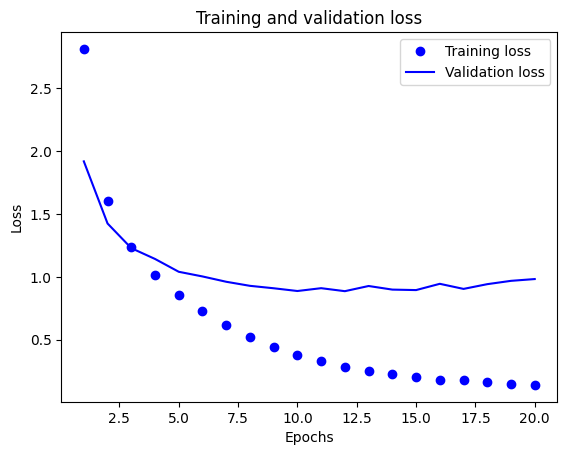

In [30]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

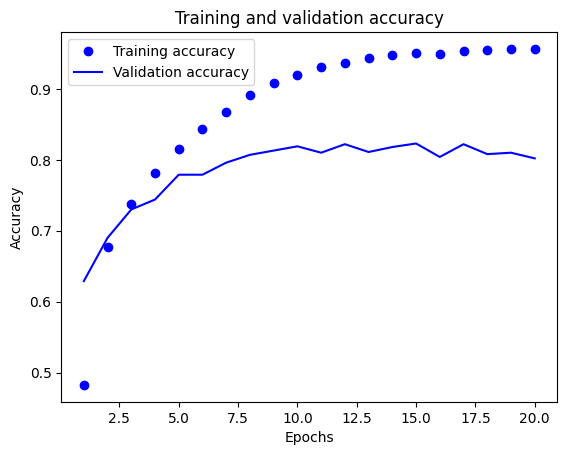

In [31]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model = Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,
        y_train,
        epochs=9,
        batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4307 - loss: 3.0655  
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6873 - loss: 1.5063 
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7464 - loss: 1.1618
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7846 - loss: 0.9733 
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8196 - loss: 0.8132 
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8589 - loss: 0.6526 
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8830 - loss: 0.5501
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9052 - loss: 0.4538 
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9195 - loss: 0.3841 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.9096 


In [34]:
results

[0.9434353709220886, 0.7831701040267944]

### Sparse Categorical crossentropy

In [35]:
y_true = tf.constant([1, 2])
y_pred = tf.constant([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.05129344, 2.3025851 ], dtype=float32)>

### Categorical crossentropy

In [47]:
y_true = to_categorical([1, 2])
y_pred = tf.constant([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.05129331, 2.3025851 ], dtype=float32)>